<!-- 
Data Science and Machine Learning
Student Name: Qadeer Hussain
Studuent Id: C00270632 
Data Source: https://population.un.org/wpp/Download/Standard/MostUsed/
United Nations: Department of Economic and Social Affairs Population Division
 -->

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data
data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)

C:\Users\qadee\AppData\Local\Temp\ipykernel_21248\145896758.py:2: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_FULL_ESTIMATES.csv', sep=',',skiprows=16, header=0)


In [3]:
# Print out the top 5 rows of data
data.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,581,497,239,269,208,375,426,323,0,0
1,2,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,567,488,230,256,203,365,413,316,0,0
2,3,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,546,475,217,239,196,351,393,307,0,0
3,4,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,536,467,211,231,191,343,384,301,0,0
4,5,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,...,522,456,203,221,185,332,372,293,0,0


In [4]:
# Filter by type Subregion
region_data = data[data['Type'] == 'Region']

region_data.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
2446,2447,Estimates,Africa,NaN,903,NaN,NaN,2.0,Region,1840,...,689,631,315,339,291,453,488,417,- 80,-0.4
2447,2448,Estimates,Africa,NaN,903,NaN,NaN,2.0,Region,1840,...,682,624,311,335,287,449,483,413,- 110,-0.5
2448,2449,Estimates,Africa,NaN,903,NaN,NaN,2.0,Region,1840,...,676,618,308,332,284,445,480,409,- 150,-0.6
2449,2450,Estimates,Africa,NaN,903,NaN,NaN,2.0,Region,1840,...,671,611,304,328,280,441,476,405,- 249,-1.0
2450,2451,Estimates,Africa,NaN,903,NaN,NaN,2.0,Region,1840,...,669,605,305,331,277,441,478,402,- 234,-0.9


In [5]:
# Selectb the column hat I will be using for the creation of the graph
choosen_column = ['Region, subregion, country or area *', 'Year', 'Births (thousands)', 'Total Deaths (thousands)']
region_data = region_data[choosen_column]

region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2446,Africa,1950.0,10 879,6 126
2447,Africa,1951.0,11 139,6 140
2448,Africa,1952.0,11 399,6 171
2449,Africa,1953.0,11 669,6 206
2450,Africa,1954.0,11 924,6 263


In [6]:
# Clean any of the numeric columns so remove spaces and commas
# As i did have a problem where it would ignore number like 10 000
region_data['Births (thousands)'] = region_data['Births (thousands)'].replace(',', '').replace(' ', '', regex=True).str.strip()
region_data['Total Deaths (thousands)'] = region_data['Total Deaths (thousands)'].replace(',', '').replace(' ', '', regex=True).str.strip()

In [7]:
# Print the data
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2446,Africa,1950.0,10879,6126
2447,Africa,1951.0,11139,6140
2448,Africa,1952.0,11399,6171
2449,Africa,1953.0,11669,6206
2450,Africa,1954.0,11924,6263


In [8]:
# Now here I am converting the columns to numeric ad handling any errors it has by converting them to Nan values
region_data['Births (thousands)'] = pd.to_numeric(region_data['Births (thousands)'], errors='coerce')
region_data['Total Deaths (thousands)'] = pd.to_numeric(region_data['Total Deaths (thousands)'], errors='coerce')

In [9]:
# Again print the data here
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands)
2446,Africa,1950.0,10879,6126
2447,Africa,1951.0,11139,6140
2448,Africa,1952.0,11399,6171
2449,Africa,1953.0,11669,6206
2450,Africa,1954.0,11924,6263


In [10]:
# alcuate the Birth to Death ratio by dividing them for example the Birth rate is 12000 and the death rate is 4000 meaning the ratio equals to 3 so for every death there are 3 births 
region_data['Births-to-Deaths Ratio'] = region_data['Births (thousands)'] / region_data['Total Deaths (thousands)']

In [11]:
# Print out the data again aswell as a column which 
region_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands),Births-to-Deaths Ratio
2446,Africa,1950.0,10879,6126,1.775873
2447,Africa,1951.0,11139,6140,1.814169
2448,Africa,1952.0,11399,6171,1.847188
2449,Africa,1953.0,11669,6206,1.880277
2450,Africa,1954.0,11924,6263,1.903880


In [12]:
# Drop any Nan values
cleaned_data = region_data.dropna(subset=['Births-to-Deaths Ratio'])

In [13]:
# Print the cleaned data 
cleaned_data.head()

,"Region, subregion, country or area *",Year,Births (thousands),Total Deaths (thousands),Births-to-Deaths Ratio
2446,Africa,1950.0,10879,6126,1.775873
2447,Africa,1951.0,11139,6140,1.814169
2448,Africa,1952.0,11399,6171,1.847188
2449,Africa,1953.0,11669,6206,1.880277
2450,Africa,1954.0,11924,6263,1.903880


In [14]:
# Setting colour for the plotted dots
colors = plt.cm.rainbow(np.linspace(0, 1, len(cleaned_data['Region, subregion, country or area *'].unique())))

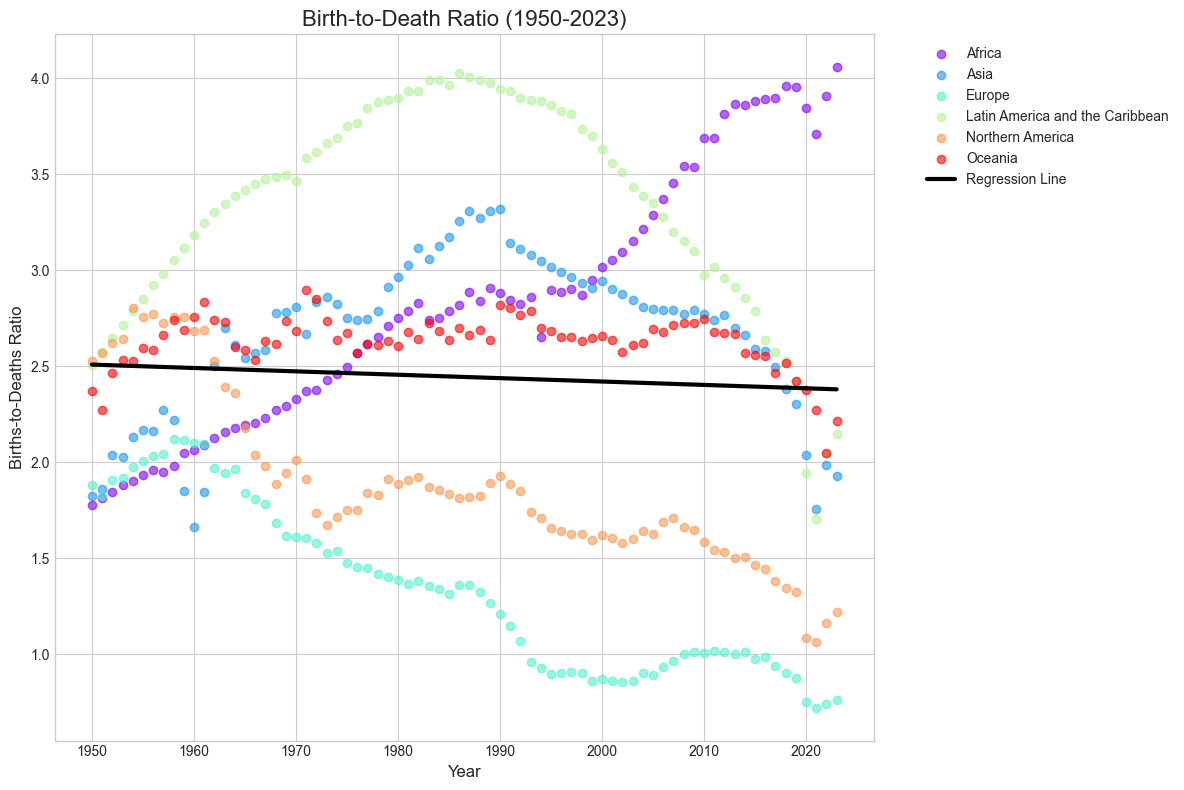

In [15]:
plt.figure(figsize=(12, 8))
# Loop through each region to plot there data
for i, region in enumerate(cleaned_data['Region, subregion, country or area *'].unique()):
    # Filter the data for each region
    region_subset = cleaned_data[cleaned_data['Region, subregion, country or area *'] == region]
    # Create a scatter plot each region usng colour and label
    plt.scatter(region_subset['Year'], region_subset['Births-to-Deaths Ratio'], color=colors[i], label=region, alpha=0.6)

# Prepare the data for linear regrsson model
model = LinearRegression()
# The X value on the graph is the Year
X = cleaned_data[['Year']]
# The Y value on the graph is the Birth to Death ratio
y = cleaned_data['Births-to-Deaths Ratio'].values
# Fit the linear regrssin model to the data 
model.fit(X, y)

# Predict the Birth to death ratio across the years 
y_prediction = model.predict(X)
# Plot the regression line using the predicted values
plt.plot(cleaned_data['Year'], y_prediction, color='black', linewidth=3, label='Regression Line')

# The title ad the axis labels and a legend to the plot 
plt.title('Birth-to-Death Ratio (1950-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Births-to-Deaths Ratio', fontsize=12)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), ncol=1)
# Display grid lines
plt.grid(True)
# Adjust all the plot so everything fits with no overlapping
plt.tight_layout()
# Display the plotted table
plt.show()

In [16]:
# User interaction: select a region and year for prediction
print("Available Regions: ", cleaned_data['Region, subregion, country or area *'].unique())

Available Regions:  ['Africa' 'Asia' 'Europe' 'Latin America and the Caribbean'
 'Northern America' 'Oceania']


In [25]:
# Input the Region and Year
selected_region = input("Enter the name of the region to predict: ")
selected_year = int(input("Enter the year to get the prediction for: "))

In [26]:
specific_region = cleaned_data[cleaned_data['Region, subregion, country or area *'] == selected_region]

In [27]:
X = specific_region[['Year']]
y = specific_region['Births-to-Deaths Ratio'].values

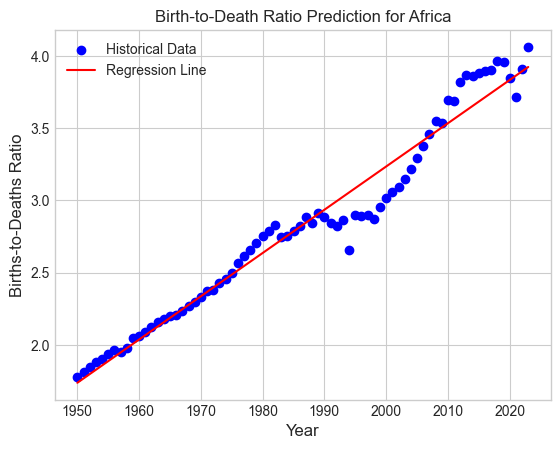

In [28]:
model = LinearRegression()
model.fit(X, y)
# Plot the data for the specific region
plt.scatter(specific_region['Year'], specific_region['Births-to-Deaths Ratio'], color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line') 
plt.title(f'Birth-to-Death Ratio Prediction for {selected_region}')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Births-to-Deaths Ratio', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [29]:
prediction = model.predict([[selected_year]])

C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
print(f"Predicted Birth-to-Death Ratio for {selected_region} in {selected_year}: {prediction[0]:.2f}")

Predicted Birth-to-Death Ratio for Africa in 2020: 3.83
